## Scikit-learn models - Balazs Balogh - 2019-11-07

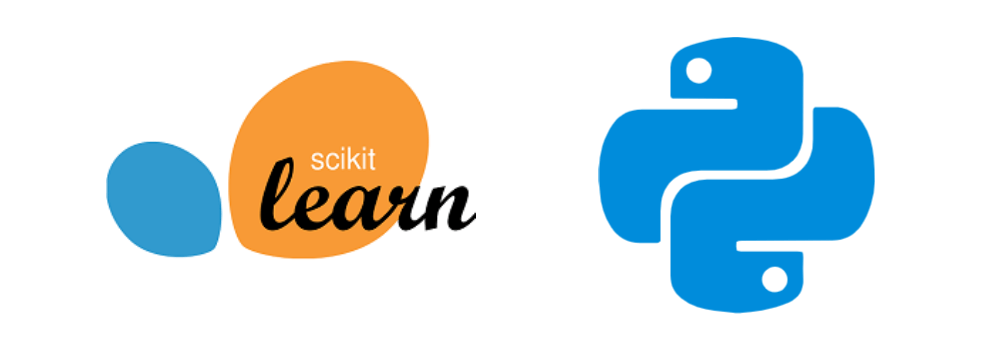

In [1]:
"""
Bank notes dataset: four features and a label, 0 or 1. 0 if the bank note is authentic, 1 if it's inauthentic.

For installing xgboost, use "conda install -c anaconda py-xgboost" in the Anaconda Prompt
"""

import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import tree, ensemble, metrics, svm
from sklearn.cluster import KMeans
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/budapestpy-workshops/sample_files/master/data_banknote_authentication.txt'
                   , header=None)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
0    1372 non-null float64
1    1372 non-null float64
2    1372 non-null float64
3    1372 non-null float64
4    1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [3]:
"""
Let's see what we have visually.
"""

data.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
"""
Variance of Wavelet Transformed image (continuous).
Skewness of Wavelet Transformed image (continuous).
Kurtosis of Wavelet Transformed image (continuous).
Entropy of image (continuous).
Class (0 for authentic, 1 for inauthentic).
"""

data.columns = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Is_it_real?']
data.head()

,Variance,Skewness,Kurtosis,Entropy,Is_it_real?
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
"""
Is this a balanced dataset?
"""

data['Is_it_real?'].value_counts()

0    762
1    610
Name: Is_it_real?, dtype: int64

In [6]:
"""
Because the target values are in order, I took 40 out from the middle, which means 20 of '0's and 20 of '1's. It is the
final_test data. Therefore I needed to drop these columns from the original, that is the data_new.
"""

data.iloc[742:782, :]

,Variance,Skewness,Kurtosis,Entropy,Is_it_real?
742,0.661910,9.659400,-0.288190,-1.663800,0
743,4.792600,1.707100,-0.051701,1.492600,0
744,4.985200,8.351600,-2.542500,-1.282300,0
745,0.757360,3.029400,2.916400,-0.068117,0
746,4.649900,7.633600,-1.942700,-0.374580,0
747,-0.023579,7.174200,0.784570,-0.757340,0
748,0.855740,0.008268,6.604200,-0.531040,0
749,0.882980,0.660090,6.009600,-0.432770,0
750,4.042200,-4.391000,4.746600,1.137000,0
751,2.254600,8.099200,-0.248770,-3.269800,0


In [7]:
final_test = data.iloc[742:782, :]
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 742 to 781
Data columns (total 5 columns):
Variance       40 non-null float64
Skewness       40 non-null float64
Kurtosis       40 non-null float64
Entropy        40 non-null float64
Is_it_real?    40 non-null int64
dtypes: float64(4), int64(1)
memory usage: 1.7 KB


In [8]:
data_new = data.drop(data.index[742:782])
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1332 entries, 0 to 1371
Data columns (total 5 columns):
Variance       1332 non-null float64
Skewness       1332 non-null float64
Kurtosis       1332 non-null float64
Entropy        1332 non-null float64
Is_it_real?    1332 non-null int64
dtypes: float64(4), int64(1)
memory usage: 62.4 KB


In [9]:
"""
Create the new dataframes for the labels. Remember, the final_features and final_labels is for the final testing. This data
is unseen for the model, completely new to it.
"""

data_features = data_new.iloc[:, 0:4]
data_label = data_new.iloc[:, 4]

final_features = final_test.iloc[:, 0:4]
final_label = final_test.iloc[:, 4]

In [10]:
"""
The "shuffle" parameter is True by default, so it will randomize the order of the data.
"""

X_train, X_test, y_train, y_test = train_test_split(
        data_features, data_label,
        test_size=0.33, random_state=42)

### After making the dataframes, let's try the models.
#### Since it's a binary classification, the baseline model accuracy of approximately 50%.

### Logistic regression

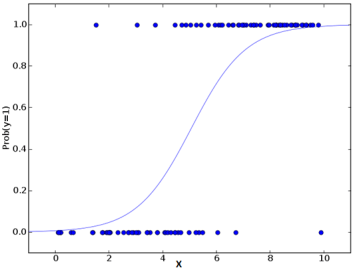

In [11]:
"""
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
"""

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\bbalogh7\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
expected = y_test
predicted = logreg.predict(X_test)

In [13]:
"""
Display metrics

Accuracy: A 99% accuracy can be excellent, good, mediocre, poor or terrible depending upon the problem.

Precision measures the impact of false positives: TP/(TP+FP). Precision is usually used when the goal is 
to limit the number of false positives(FP).

Recall can be defined as the ratio of the total number of correctly classified positive examples 
divide to the total number of positive examples. High Recall indicates the class is correctly 
recognized (small number of FN). : TP/(TP+FN)

High recall, low precision:This means that most of the positive examples are correctly recognized 
(low FN) but there are a lot of false positives.

Low recall, high precision:This shows that we miss a lot of positive examples (high FN) but those we 
predict as positive are indeed positive (low FP)

F1 is the weighted average of precision and recall: (2*Recall*Precision)/(Recall+Precision)
"""

print(metrics.classification_report(expected, predicted, target_names=['authentic', 'inauthentic']))

              precision    recall  f1-score   support

   authentic       0.98      0.99      0.99       246
 inauthentic       0.98      0.98      0.98       194

    accuracy                           0.98       440
   macro avg       0.98      0.98      0.98       440
weighted avg       0.98      0.98      0.98       440



In [14]:
logreg_matrix = metrics.confusion_matrix(expected, predicted)

print(logreg_matrix)

[[243   3]
 [  4 190]]


In [15]:
"""
And here's how it works on unseen data.
"""

final_logreg_predict = logreg.predict(final_features)
final_logreg_matrix = metrics.confusion_matrix(final_label, final_logreg_predict)

print(final_logreg_matrix)

[[20  0]
 [ 0 20]]


### Decision Tree

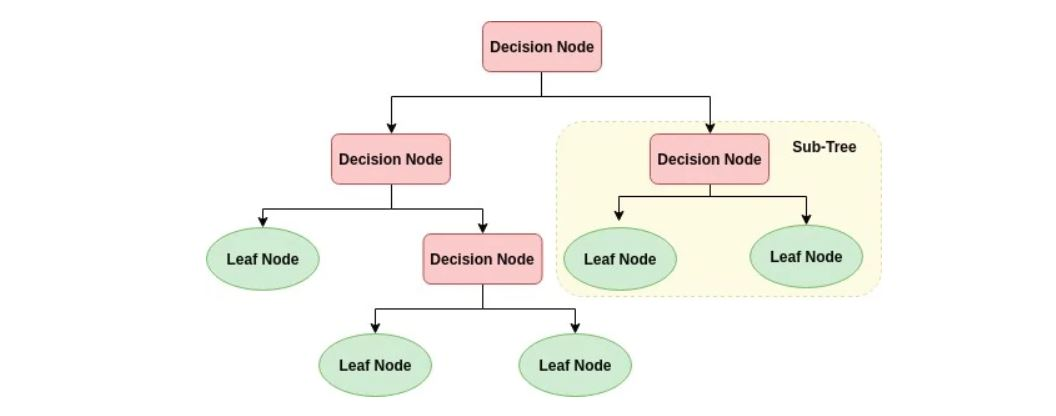

In [16]:
"""
https://www.datacamp.com/community/tutorials/decision-tree-classification-python

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
"""

decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)

In [17]:
expected = y_test
predicted = decision_tree.predict(X_test)

In [18]:
print(metrics.classification_report(expected, predicted, target_names=['authentic', 'inauthentic']))

              precision    recall  f1-score   support

   authentic       0.97      1.00      0.98       246
 inauthentic       0.99      0.96      0.98       194

    accuracy                           0.98       440
   macro avg       0.98      0.98      0.98       440
weighted avg       0.98      0.98      0.98       440



In [19]:
"""
Confusion matrix: https://www.geeksforgeeks.org/confusion-matrix-machine-learning/
"""

decision_tree_matrix = metrics.confusion_matrix(expected, predicted)

print(decision_tree_matrix)

[[245   1]
 [  7 187]]


In [20]:
"""
A little detour to Grid Search.

"A better approach would be to develop an algorithm which automatically finds the best parameters 
for a particular model. Grid Search is one such algorithm.""

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
"""

params = {'criterion' : ['gini', 'entropy'],
          'max_depth' : [1, 3, 5, 8, 10, None],
          'splitter' : ['best', 'random'],
          'min_samples_split' : [2, 3, 4]}

grid_search = GridSearchCV(estimator=decision_tree, cv=3, param_grid=params)

grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

0.9865470852017937
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 4, 'splitter': 'random'}


In [21]:
"""
See on another Decision tree model, how good was the parameter tuning.
"""

decision_tree_gs = tree.DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=3, splitter='random')
decision_tree_gs = decision_tree_gs.fit(X_train, y_train)

expected = y_test
predicted = decision_tree_gs.predict(X_test)

decision_tree_matrix_gs = metrics.confusion_matrix(expected, predicted)

print(metrics.classification_report(expected, predicted, target_names=['authentic', 'inauthentic']), '\n')

print(decision_tree_matrix_gs)

              precision    recall  f1-score   support

   authentic       1.00      0.98      0.99       246
 inauthentic       0.98      0.99      0.99       194

    accuracy                           0.99       440
   macro avg       0.99      0.99      0.99       440
weighted avg       0.99      0.99      0.99       440
 

[[242   4]
 [  1 193]]


In [22]:
print(decision_tree.feature_importances_)

[0.61410899 0.22988244 0.13635681 0.01965176]


In [23]:
"""
And here's how it works on unseen data.
"""

final_decision_tree_predict = decision_tree_gs.predict(final_features)
final_decision_tree_matrix = metrics.confusion_matrix(final_label, final_decision_tree_predict)

print(final_decision_tree_matrix)

[[20  0]
 [ 0 20]]


### Random Forest

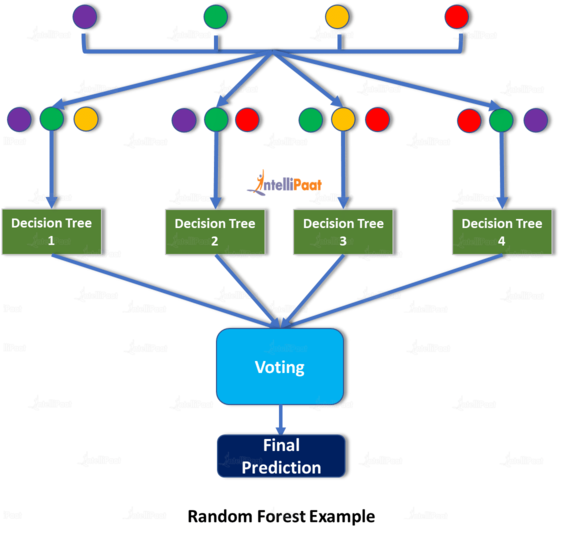

In [24]:
"""
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/
"""

clf = ensemble.RandomForestClassifier(n_estimators=10, max_depth=3)
clf = clf.fit(X_train, y_train)

In [25]:
expected = y_test
predicted = clf.predict(X_test)

In [26]:
print(metrics.classification_report(expected, predicted, target_names=['authentic', 'inauthentic']))

              precision    recall  f1-score   support

   authentic       0.93      0.96      0.95       246
 inauthentic       0.95      0.91      0.93       194

    accuracy                           0.94       440
   macro avg       0.94      0.94      0.94       440
weighted avg       0.94      0.94      0.94       440



In [27]:
random_forest_matrix = metrics.confusion_matrix(expected, predicted)

print(random_forest_matrix)

[[237   9]
 [ 18 176]]


In [28]:
"""
Cross validation with 5 folds.

https://scikit-learn.org/stable/modules/cross_validation.html

The standard deviation is low, which means that our model has a very low variance, which is actually very good 
since that means that the prediction that we obtained on one test set is not by chance. 
Rather, the model will perform more or less similar on all test sets.
"""

cv = cross_val_score(clf, X_train, y_train, cv=5)

print('Cross validation scores:', cv)
print('Mean of the CV:', np.mean(cv))
print('Std of the CV:', cv.std())

Cross validation scores: [0.97777778 0.95505618 0.97752809 0.97191011 0.92134831]
Mean of the CV: 0.9607240948813983
Std of the CV: 0.021358401950566434


In [29]:
"""
And here's how it works on unseen data.
"""

final_random_forest_predict = clf.predict(final_features)
final_random_forest_matrix = metrics.confusion_matrix(final_label, final_random_forest_predict)

print(final_random_forest_matrix)

[[20  0]
 [ 2 18]]


### Support Vector Machines (SVM)

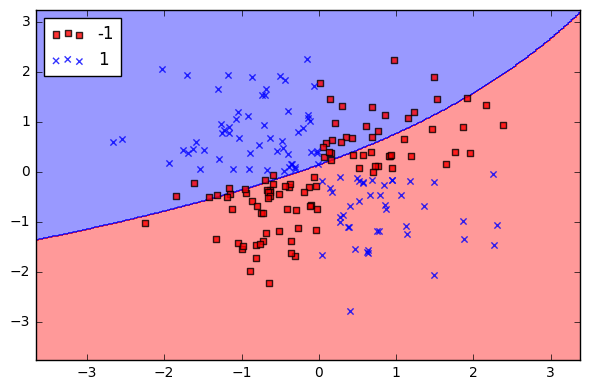

In [30]:
"""
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python"""

svc = svm.SVC()
svc = svc.fit(X_train, y_train)

C:\Users\bbalogh7\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [31]:
expected = y_test
predicted = svc.predict(X_test)

In [32]:
print(metrics.classification_report(expected, predicted, target_names=['authentic', 'inauthentic']))

              precision    recall  f1-score   support

   authentic       1.00      1.00      1.00       246
 inauthentic       1.00      1.00      1.00       194

    accuracy                           1.00       440
   macro avg       1.00      1.00      1.00       440
weighted avg       1.00      1.00      1.00       440



In [33]:
svc_matrix = metrics.confusion_matrix(expected, predicted)

print(svc_matrix)

[[246   0]
 [  0 194]]


In [34]:
"""
And here's how it works on unseen data.
"""

final_svc_predict = svc.predict(final_features)
final_svc_matrix = metrics.confusion_matrix(final_label, final_svc_predict)

print(final_svc_matrix)

[[20  0]
 [ 0 20]]


### XGBoost

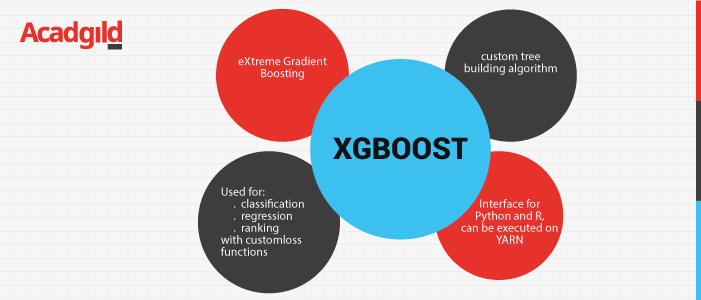

In [35]:
"""
https://www.datacamp.com/community/tutorials/xgboost-in-python
https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/ - How to tune?
https://towardsdatascience.com/machine-learning-part-18-boosting-algorithms-gradient-boosting-in-python-ef5ae6965be4

"When in doubt, use xgboost." - Avito Winner’s Interview: 1st place, Owen Zhang

Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models 
and then added together to make the final prediction.
"""

xgboost = XGBClassifier(n_estimators=10)
xgboost = xgboost.fit(X_train, y_train)

In [36]:
# Predict the full data set
expected = y_test
predicted = xgboost.predict(X_test)

In [37]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       246
           1       0.95      0.95      0.95       194

    accuracy                           0.96       440
   macro avg       0.96      0.96      0.96       440
weighted avg       0.96      0.96      0.96       440



In [38]:
xgboost_matrix = metrics.confusion_matrix(expected, predicted)

print(xgboost_matrix)

[[237   9]
 [  9 185]]


In [39]:
"""
And here's how it works on unseen data.
"""

final_xgboost_predict = clf.predict(final_features)
final_xgboost_matrix = metrics.confusion_matrix(final_label, final_xgboost_predict)

print(final_xgboost_matrix)

[[20  0]
 [ 2 18]]


In [40]:
"""
Let's see all of the results together. Remember the perfect answer is 20/20.
"""

print('Logistic regression:')
print(final_logreg_matrix, '\n')

print('Decision tree:')
print(final_decision_tree_matrix, '\n')

print('Random forest:')
print(final_random_forest_matrix, '\n')

print('Support Vector Machines:')
print(final_svc_matrix, '\n')

print('XGBoost:')
print(final_xgboost_matrix)

Logistic regression:
[[20  0]
 [ 0 20]] 

Decision tree:
[[20  0]
 [ 0 20]] 

Random forest:
[[20  0]
 [ 2 18]] 

Support Vector Machines:
[[20  0]
 [ 0 20]] 

XGBoost:
[[20  0]
 [ 2 18]]
